# **Breast Cancer Survival Analysis**

Synthetic dataset about 200 breast cancer patients. At the start, all the variables are continuos, to make the dataset more easy to interpret we perform data conversion. After data pre-processing the dataset is composed by the variables age, chemo (wheter the patient received or not chemotherapy: 1=yes 0=no), hormone (whether the patient recived or not hormone therapy: 1=yes 0=no), duration (indicates the survival time) and event (whether the event death occurred or not: 1=yes, 0=censored).
Censorship is the situation in which the time to an event is not observed for all the subjects. The objective of the project is to investigate the lifespan of teh patients, studying the relationship between time and death and comparing how much this changes considering different predictors.

# **1. Kaplan-Meier Estimation**
Method to estimate the probability of survival as a function of time. It takes as inputs the duration and the event (whether it occured or not).

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install lifelines

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=4da50728f0412bf0178f3e95d49671fec27fd6bd542c79e8371b564801cbb646
  Stored in directory: c:\users\aguarino\appdata\local\pip\cache\wheels\50\37\21\0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [12]:

from lifelines.datasets import load_regression_dataset
health_data = load_regression_dataset()
health_data = health_data.rename(columns={
    'var1': 'age',
    'var2': 'chemo',
    'var3': 'hormone',
    'T': 'duration',
    'E': 'event'
})
health_data.head()


,age,chemo,hormone,duration,event
0,0.595170,1.143472,1.571079,14.785652,1
1,0.209325,0.184677,0.356980,7.335846,1
2,0.693919,0.071893,0.557960,5.269797,1
3,0.443804,1.364646,0.374221,11.684092,1
4,1.613324,0.125566,1.921325,7.639492,1


In [14]:
#Convert variable age into an integer
health_data["age"] = health_data["age"].astype(int)
#Use the mean as cutoff to convert the variable chemo into an integer
health_data["chemo"] = (health_data["chemo"] > health_data["chemo"].mean()).astype(int)
health_data["hormone"] = (health_data["hormone"] > health_data["hormone"].mean()).astype(int)

In [16]:
# Summary statistics
print(health_data.describe())
#Check the distribution of the event
print(health_data['event'].value_counts())

              age       chemo     hormone    duration       event
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean     0.485000    0.410000    0.350000    9.400928    0.945000
std      0.885265    0.493068    0.478167    3.572022    0.228552
min      0.000000    0.000000    0.000000    2.575538    0.000000
25%      0.000000    0.000000    0.000000    6.832556    1.000000
50%      0.000000    0.000000    0.000000    8.896869    1.000000
75%      1.000000    1.000000    1.000000   11.473951    1.000000
max      5.000000    1.000000    1.000000   21.939978    1.000000
event
1    189
0     11
Name: count, dtype: int64


<Axes: xlabel='timeline'>

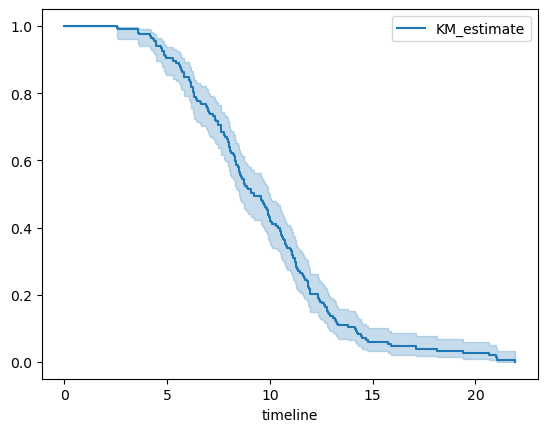

In [36]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(health_data['duration'], health_data['event'])
kmf.plot_survival_function()


`survival_function_` organizes the data set by time and survival function  estimate at each time. At time 0 the survival is 100%.



In [32]:
kmf.survival_function_

,KM_estimate
timeline,
0.000000,1.000000
2.575538,0.995000
2.632264,0.990000
3.563581,0.985000
3.563830,0.980000
...,...
19.372117,0.026604
20.665225,0.019953
20.981381,0.013302


The package also contains the upper and lower confidence intervals. This can be used to explain certainty.

In [38]:
ci = kmf.confidence_interval_survival_function_
ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.000000,1.000000,1.000000
2.575538,0.965041,0.999294
2.632264,0.960611,0.997490
3.563581,0.954220,0.995137
3.563830,0.947594,0.992446
...,...,...
19.372117,0.009251,0.060289
20.665225,0.005707,0.051513
20.981381,0.002731,0.042378
21.031823,0.000628,0.033097


The `event_table` function outputs a summary of the life table. \
For every time, \


*   The number of subjects **removed**
*   The number of subjects **censored**, meaning the event has not occured for them however we don't have any information past this point
*   Number of subjects **entering** the study
*   Number of subjects **at risk** for having the event occur







In [40]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.000000,0,0,0,200,200
2.575538,1,1,0,0,200
2.632264,1,1,0,0,199
3.563581,1,1,0,0,198
3.563830,1,1,0,0,197
...,...,...,...,...,...
19.372117,1,1,0,0,5
20.665225,1,1,0,0,4
20.981381,1,1,0,0,3


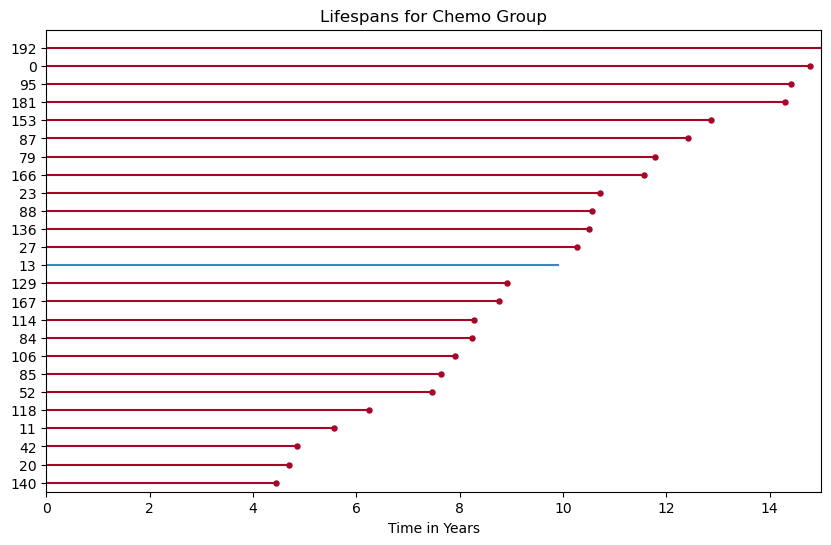

In [54]:
import lifelines
from lifelines import plotting
# Filter by category (treatment == "chemo")
subset = health_data[health_data["chemo"] == 1]
#take a subsample
subset_sample = subset.sample(n=25, random_state=42)

# Plot
plt.figure(figsize=(10, 6))
ax = lifelines.plotting.plot_lifetimes(
    durations=subset_sample["duration"],
    event_observed=subset_sample["event"]
)
ax.set_xlim(0, 15)
ax.set_xlabel("Time in Years")
plt.title("Lifespans for Chemo Group")
plt.show()


The lifespan (timeline) plot shows individual survival times for a subset of patients who received chemotherapy (chemo == 1), based on the sample of 25 individuals. Each horizontal line corresponds to a single patient from the sampled subset. The numbers on the Y-axis are the DataFrame indices of those individuals. The dot at the end of the line indicate sthat the event occurred.



Next, we plot Kaplan-Meier curves to compare chemo vs non-chemo groups:

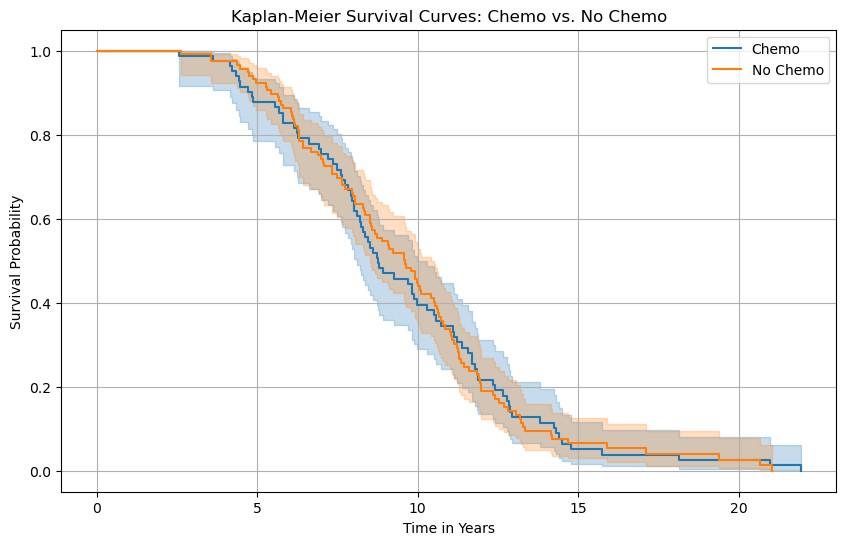

In [46]:

from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Create groups
chemo_group = health_data[health_data["chemo"] == 1]
no_chemo_group = health_data[health_data["chemo"] == 0]

# Initialize KM fitter
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

# Fit for chemo group
kmf.fit(durations=chemo_group["duration"], event_observed=chemo_group["event"], label="Chemo")
kmf.plot_survival_function()

# Fit for no chemo group
kmf.fit(durations=no_chemo_group["duration"], event_observed=no_chemo_group["event"], label="No Chemo")
kmf.plot_survival_function()

# Customize plot
plt.title("Kaplan-Meier Survival Curves: Chemo vs. No Chemo")
plt.xlabel("Time in Years")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

Finally, we can plot the survival probabilities as function of time to visually understand  life expectancy.

<Axes: xlabel='timeline'>

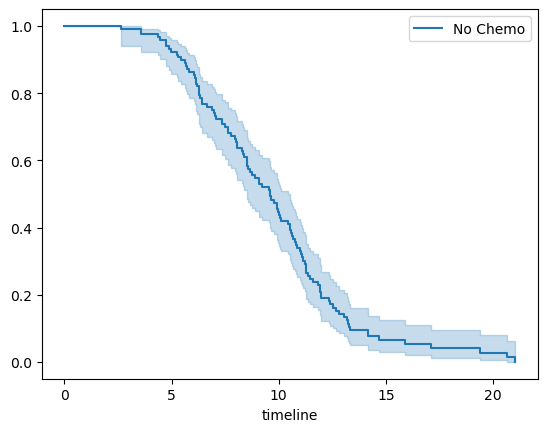

In [48]:
kmf.plot()

The blue line represents the Kaplan-Meier estimator of survival for the no chemo group. The shaded area indcates the 95% confidence interval.

In [58]:

kmf.predict(10) #predicted survival probability at time = 10

0.4386328355714485

<Axes: xlabel='timeline'>

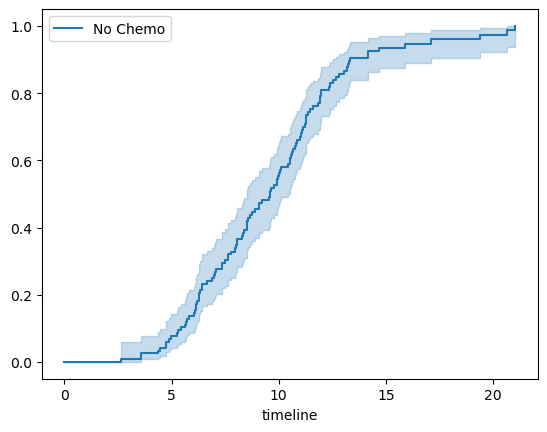

In [60]:
# Let's plot the cumulative density function
kmf.plot_cumulative_density()

The Cumulative Density function is the inverse of the survival function plot. This answers "What is the likelihood of death?"


# **2. Cox - Hazard Model**
The Cox-Hazard Function is a method used to study the relationship between the time to an event outcome and any predicting features. It is used to estimate the hazard ratio. It takes as inputs the duration, the event (whether it occurred or not) and any other predictors/features.

1. Fitting the Regression
2. Plotting the Coefficients
3. Plotting the effect of varying a covariate

<Axes: xlabel='log(HR) (95% CI)'>

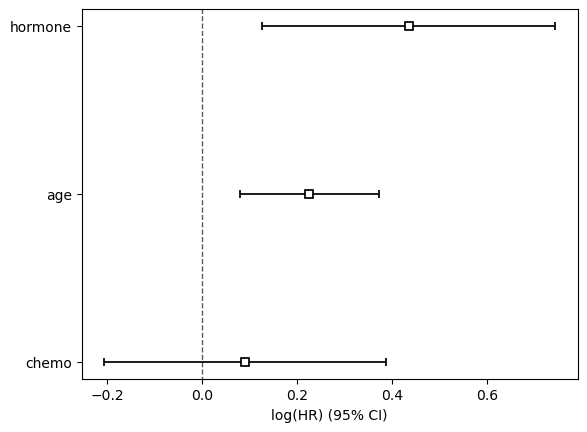

In [62]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(health_data, duration_col='duration', event_col='event')
cph.plot()

The plot shows the logarithm of the Hazard Ratio. The square marker at the center of a line indicates the estimated log(HR) for the variable while the horizontal line through the marker represents the 95% confidence interval of the estimate.
The log(HR) is positive suggesting a statistically significant increased risk with age. Also for the variable hormone the association is positive. In the case of chemo instead the log (HR) is near 0 and the confidence interval crosses the 0, this means that he effect of chemotherapy on hazard is not statistically significant .

In [64]:
# Fitting the regression
cph = CoxPHFitter()
cph.fit(health_data, duration_col='duration', event_col='event')

<lifelines.CoxPHFitter: fitted with 200 total observations, 11 right-censored observations>

Next, we plot the hazard ratios for each covariate.

A hazard ratio of 1 means lack of association, a hazard ratio greater than 1 suggests an increased risk, and a hazard ratio below 1 suggests a smaller risk

<Axes: xlabel='HR (95% CI)'>

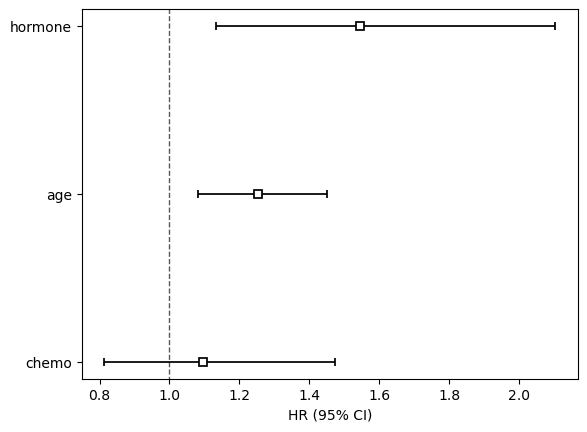

In [66]:
cph.plot(hazard_ratios = True)

We can also look at the effect of varying a covariate.



`plot_partial_effects_on_outcome` produces a plot comparing the baseline curve of the model versus what happens when a covariate(s) is varied over values in a group. This is useful to compare subjects’ survival as we vary covariate(s), all else being held equal.

<Axes: >

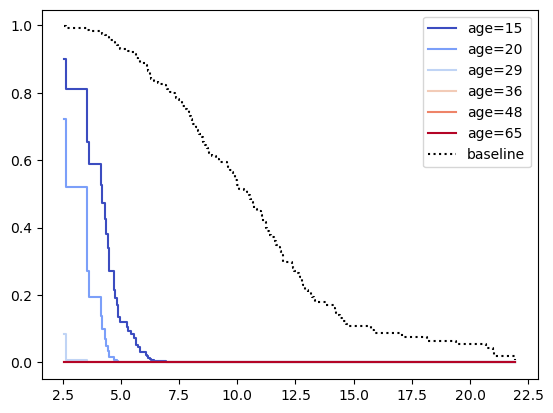

In [68]:
# Let's look at how the survival function varies for the age covariate
cph.plot_partial_effects_on_outcome(covariates='age', values=[15, 20, 29, 36, 48, 65], cmap='coolwarm')

# **3. Log-Rank Test**
A hypothesis test used to compare the survival distribution of 2 samples.
Null hypothesis being there is no significant difference between the samples. Can be thought of as a test of whether the survival curves are identical or overlapping or not.

Null hypothesis: Both groups have identical distribution curves.
Alternative hypothesis: Both groups have different distribution curves.


Answers the q: "Is the difference in survival between these 2 groups significant?"


In [70]:
T1 = [10, 24, 20, 12, 15, 23, 30]
E1 = [1, 0, 1,  0,  1,  1, 1]

T2 = [5, 7, 8, 6, 2, 3, 1, 4]
E2 = [1, 1, 1, 1,  1,  1,  1, 1]

from lifelines.statistics import logrank_test
results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)

#results.print_summary()
print("p_value: ",results.p_value)

p_value:  0.00010518428688965087


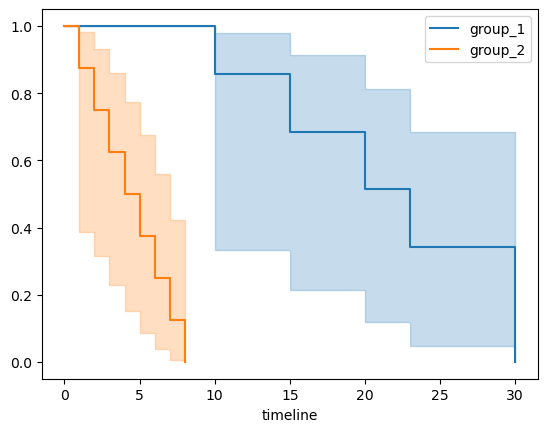

In [72]:
kmf.fit(T1, E1, label='group_1')
ax = kmf.plot_survival_function()

kmf.fit(T2, E2, label='group_2')
ax = kmf.plot_survival_function(ax=ax)

Is this p-value is greater than the significance level? If we consider a significance level of 0.05, the p-value is clearly smaller  so we can conclude that there is a sgnificative diffreence between the two samples.